**Image Identification using Neural Network**

In [ ]:
# pip install numpy tensorflow matplotlib opencv-python

In [2]:
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

In [ ]:
training_images, testing_images = training_images / 255, testing_images / 255

In [8]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
# for i in range(10):
#     plt.subplot(4, 4, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(training_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[training_labels[i][0]])
# plt.show()

In [ ]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [3]:
model = models.Sequential()

In [ ]:
model.add(layers.Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.2688 - loss: 1.9472 - val_accuracy: 0.4737 - val_loss: 1.4387
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.4915 - loss: 1.4092 - val_accuracy: 0.5445 - val_loss: 1.2745
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.5608 - loss: 1.2439 - val_accuracy: 0.5677 - val_loss: 1.2199
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6162 - loss: 1.0826 - val_accuracy: 0.5925 - val_loss: 1.1555
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.6505 - loss: 0.9886 - val_accuracy: 0.6162 - val_loss: 1.0944
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6794 - loss: 0.9058 - val_accuracy: 0.6415 - val_loss: 1.0280
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7097 - loss: 0.8156 - val_accuracy: 0.6363 - val_loss: 1.0433
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.7378 - loss: 0.7440 - 

In [ ]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6709 - loss: 1.0319
Loss: 1.068300485610962
Accuracy: 0.6620000004768372


In [ ]:
model.save('image_classifier.keras')

In [5]:
model = models.load_model('image_classifier.keras')

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245,142 (957.59 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122,572 (478.80 KB)

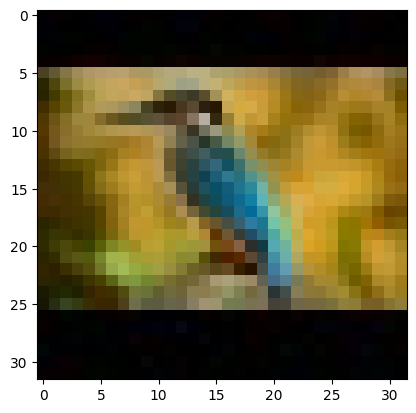

In [10]:
img = cv.imread('bird_resize.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [11]:
prediction = model.predict(np.array([img]) / 255)
print(f'Prediction: {class_names[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: Bird


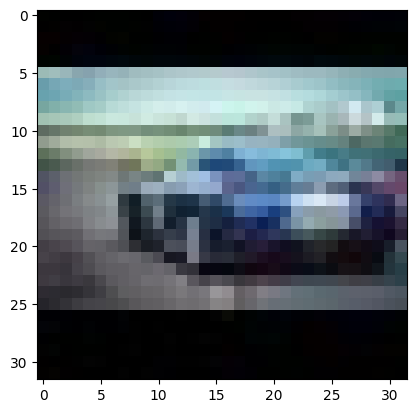

In [12]:
img = cv.imread('car_resize.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [13]:
prediction = model.predict(np.array([img]) / 255)
print(f'Prediction: {class_names[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: Car


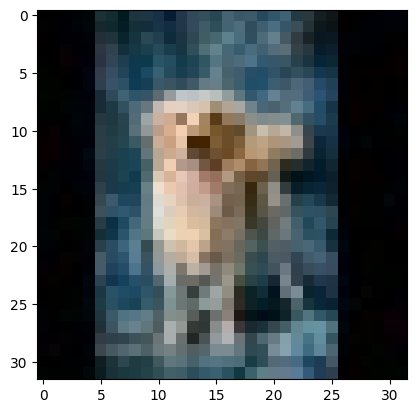

In [18]:
img = cv.imread('dog_resize.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [19]:
prediction = model.predict(np.array([img]) / 255)
print(f'Prediction: {class_names[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: Dog


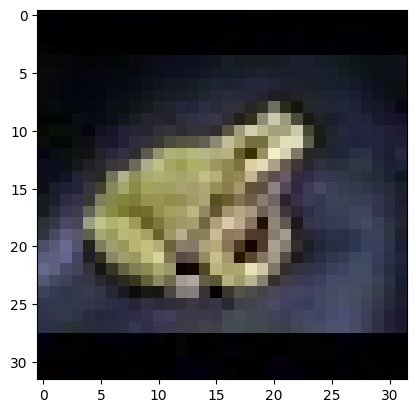

In [20]:
img = cv.imread('frog_resize.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [21]:
prediction = model.predict(np.array([img]) / 255)
print(f'Prediction: {class_names[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: Frog


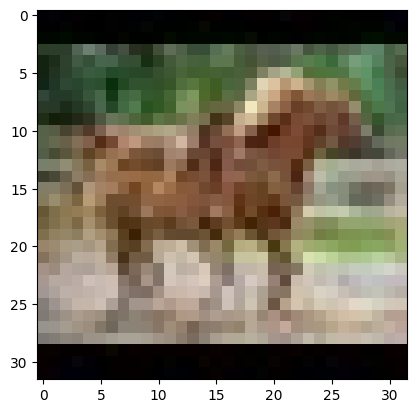

In [22]:
img = cv.imread('horse_resize.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [23]:
prediction = model.predict(np.array([img]) / 255)
print(f'Prediction: {class_names[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: Horse


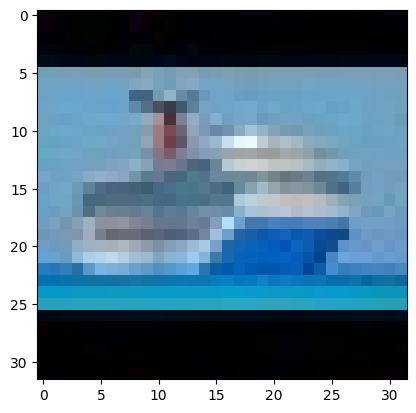

In [24]:
img = cv.imread('ship_resize.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [25]:
prediction = model.predict(np.array([img]) / 255)
print(f'Prediction: {class_names[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: Ship


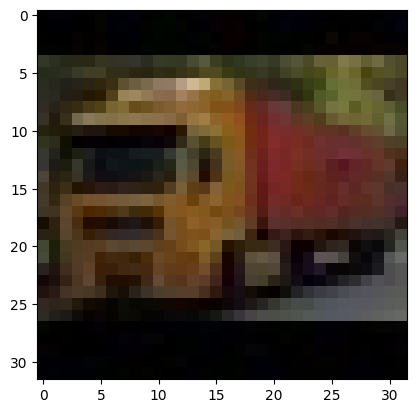

In [26]:
img = cv.imread('truck_resize.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [27]:
prediction = model.predict(np.array([img]) / 255)
print(f'Prediction: {class_names[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: Truck


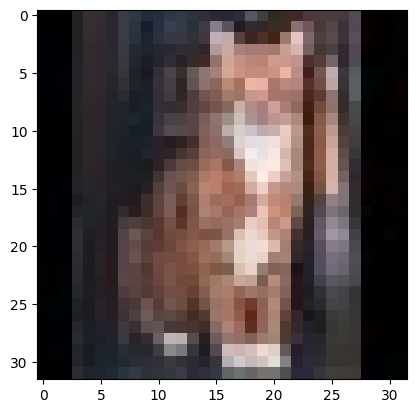

In [28]:
img = cv.imread('cat_resize.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [29]:
prediction = model.predict(np.array([img]) / 255)
print(f'Prediction: {class_names[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Prediction: Deer


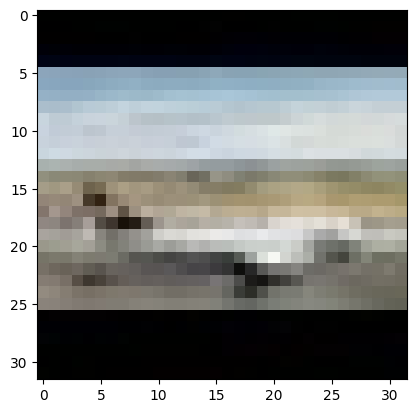

In [30]:
img = cv.imread('airplane_resize.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [31]:
prediction = model.predict(np.array([img]) / 255)
print(f'Prediction: {class_names[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: Ship


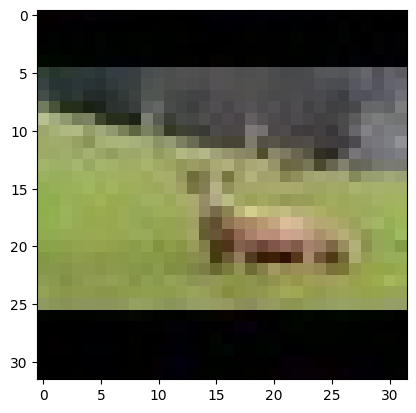

In [32]:
img = cv.imread('deer_resize.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [33]:
prediction = model.predict(np.array([img]) / 255)
print(f'Prediction: {class_names[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Prediction: Ship


**By Suryanarayan Panda**